#### Import libraries

In [2]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
from PIL import Image

#### Read some images

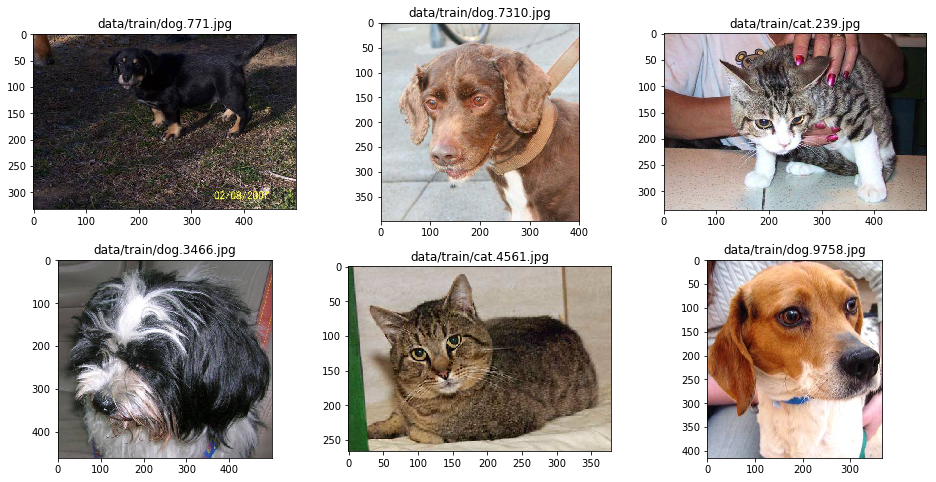

In [3]:
train_path = "data/train"
images = glob.glob(os.path.join(train_path, "*.jpg"))

plt.figure(figsize=(16, 8))
for index in range(6):
    plt.subplot(2, 3, index+1)
    img_index=int(np.random.uniform(0, 24999))
    plt.imshow(plt.imread(images[img_index]))
    plt.title(images[img_index])

#### Get max/min height and width

In [4]:
max_w=0
max_h=0
min_w=2048
min_h=2048

arr_h=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
arr_w=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for img_index in range(len(images)):
    img=Image.open(images[img_index]).size
    img_w=img[0]
    img_h=img[1]
    
    arr_w[int(img_w / 100)-1] += 1
    arr_h[int(img_h / 100)-1] += 1

    if img_w > max_w: max_w = img_w
    elif img_w < min_w: min_w = img_w
    
    if img_h > max_h: max_h = img_h
    elif img_h < min_h: min_h = img_h

print("Max Width: %i - Min Width: %i \nMax Height: %i - Min Height: %i" % (max_w, min_w, max_h, min_h))

Max Width: 1050 - Min Width: 42 
Max Height: 768 - Min Height: 32


#### Size distribution

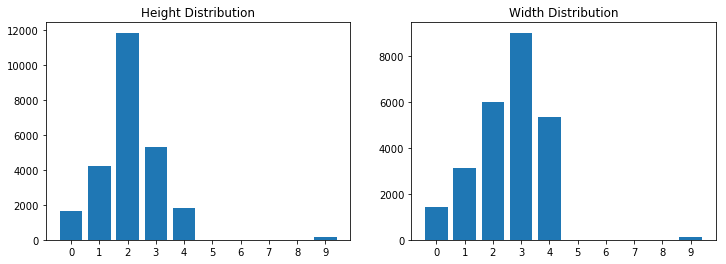

In [5]:
plt.figure(figsize=(12, 4))
ax = plt.subplot(1,2,1)
ax.bar(range(10), arr_h)
ax.set_xticks(np.arange(10))
plt.title("Height Distribution")
ax = plt.subplot(1,2,2)
ax.bar(range(10), arr_w)
ax.set_xticks(np.arange(10))
plt.title("Width Distribution")

#### Resizing and Padding

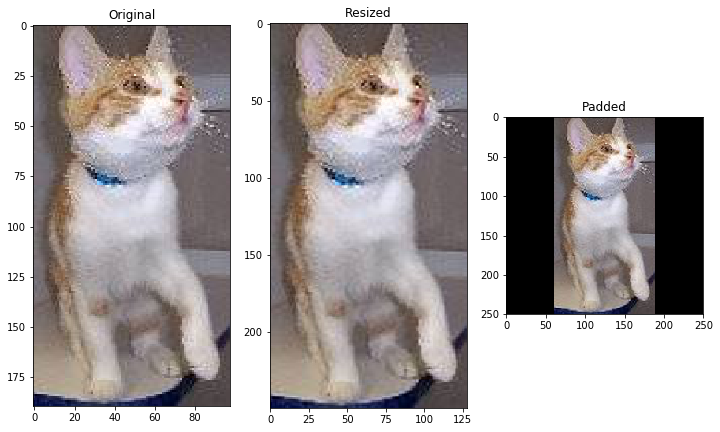

In [12]:
def resizeImg(image):
    img_w=image.size[0]
    img_h=image.size[1]
    #print("Image: %s (%i x %i)" % (imgUrl, img_w, img_h))
    
    slot = int(img_w/100) +1 if img_w > img_h else int(img_h/100) +1 
    
    if slot == 1:
        img = image.resize((img_w*2,img_h*2), Image.ANTIALIAS)
    else:
        if img_w >= img_h:
            img = image.resize((250,int(250*img_h/img_w)), Image.ANTIALIAS)
        else:
            img = image.resize((int(250*img_w/img_h),250), Image.ANTIALIAS)
        
    return img;

def padImg(image):
    img_w=image.size[0]
    img_h=image.size[1]
    
    if img_w > 250 or img_h > 250:
        if img_w >= img_h:
            new_size = (img_w, img_w)
        else:
            new_size = (img_h, img_h)
    else:
        new_size = (250, 250)
        
    img = Image.new("RGB", new_size)
    img.paste(image, (int((new_size[0]-img_w)/2),int((new_size[1]-img_h)/2)))
        
    return img;

#testImage = Image.open(images[int(np.random.uniform(0, 24999))])
testImage = Image.open(images[468])
resized = resizeImg(testImage)
padded = padImg(resized)

plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(testImage)
plt.title("Original")
plt.subplot(1, 3, 2)
plt.imshow(resized)
plt.title("Resized")
plt.subplot(1, 3, 3)
plt.imshow(padded)
plt.title("Padded")